# Бровцин Игорь, гр. 3530903/70302, вариант 2

> 3. Определить тип сериализации у вашего файла, из изученных на практике и лекции.

Это формат comma-separated values — формат "морская свинка" (конкретно часть про запятые имеет отношение к фактическому разделителю такое же, как морская свинка имеет к морю, потому что пихают туда кто во что горазд, обычно semicolon (`;`).

Загружать можно через `csv` из stdlib (это для программистов, з/п которых даже бомж в толстовке «мэйл ру групп» считает копейками) или через уютненький pandas прямо в датафреймы (это для дата-саентистов, з/п которых пронзает небеса)

In [80]:
import pandas as pd
import numpy as np
data = pd.read_csv("var02.csv", index_col=0)

>4. Считать данные файла c помощью языка python и среды разработки Jupyter и выполнить следующие действия:

> Найти среднее и дисперсию каждого столбца.

Просто:

In [37]:
data.describe()

,issqd,tgwis,lpurr
count,100.000000,100.000000,100.000000
mean,10.709672,12.822898,12.174817
std,19.775325,21.117475,28.228534
min,-24.033425,-7.382003,-156.965353
25%,4.251712,4.265025,4.638543
50%,8.710307,10.210038,10.278707
75%,14.144253,16.207630,17.668104
max,143.551699,159.862323,183.615937


Непросто:

In [38]:
data["issqd"].mean(), data["tgwis"].mean(), data["lpurr"].mean()

(10.709672303086899, 12.822898236702056, 12.174816972706529)

In [39]:
data["issqd"].std(), data["tgwis"].std(), data["lpurr"].std()

(19.77532518185768, 21.117474566481444, 28.228533886084684)

> - Визуализировать датасет любым удобным способом. Можно несколькими графиками

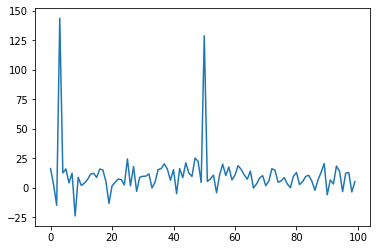

In [40]:
data["issqd"].plot()

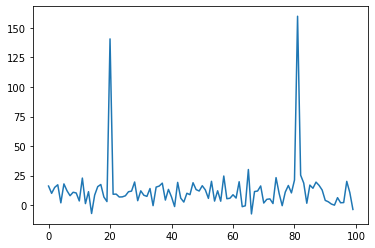

In [41]:
data["tgwis"].plot()

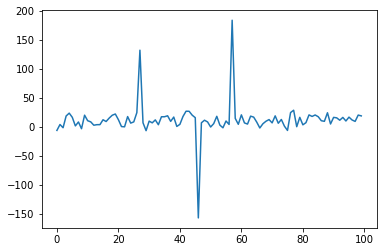

In [42]:
data["lpurr"].plot()

> - Построить графики для каждой пары признаков в наборе данных.

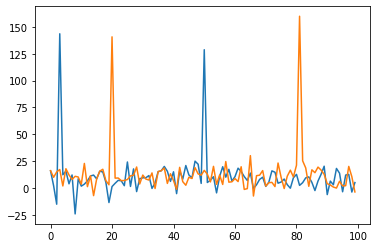

In [43]:
ax = data["issqd"].plot()
data["tgwis"].plot(ax=ax)

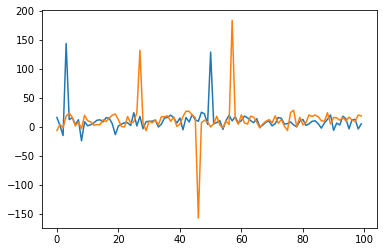

In [44]:
ax = data["issqd"].plot()
data["lpurr"].plot(ax=ax)

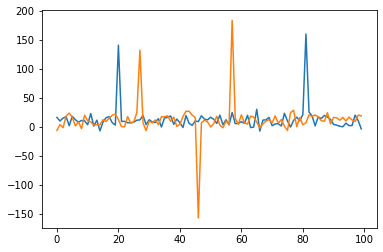

In [45]:
ax = data["tgwis"].plot()
data["lpurr"].plot(ax=ax)

> - Построить гистограмму каждого из признаков.

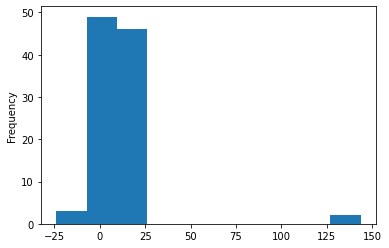

In [47]:
data["issqd"].plot.hist()

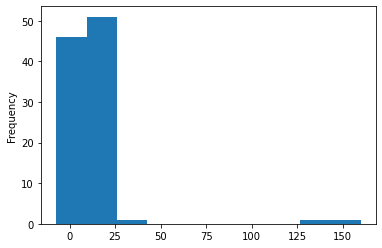

In [48]:
data["tgwis"].plot.hist()

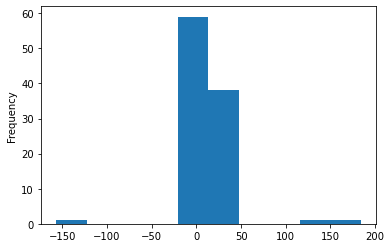

In [49]:
data["lpurr"].plot.hist()

> - Найти выбросы. Удалить их.

>     Если номер варианта четный - удалить всю строку данных из выборки.

In [77]:
mean_keys = data.columns
means = [data[k].mean() for k in mean_keys]

data["Outstanding"] = sum([abs(data[k]) < abs(means[i]) * 10 for i, k in enumerate(mean_keys)]) < len(mean_keys)
filtered = data[data["Outstanding"] == False]
filtered

,issqd,tgwis,lpurr,Outstanding
0,16.094858,16.185259,-6.191322,False
1,2.160382,10.037132,3.969154,False
2,-15.002846,15.051222,-1.579902,False
4,12.394263,1.990535,23.574982,False
5,15.762737,18.012194,16.353897,False
...,...,...,...,...
95,-3.431341,2.055402,16.691261,False
96,12.121737,2.216489,11.796341,False
97,12.767933,20.158369,9.338003,False
98,-3.690659,10.622768,20.219277,False


> - Найти новые средние и дисперсии

Давайте просто

In [78]:
filtered.describe()

,issqd,tgwis,lpurr
count,93.000000,93.000000,93.000000
mean,8.143232,9.704115,10.979113
std,8.290695,7.432082,8.189780
min,-24.033425,-7.382003,-6.643950
25%,4.346964,3.811672,4.734904
50%,8.551305,9.972654,10.055097
75%,13.839679,15.320142,17.358354
max,25.050085,30.179824,28.583308


> сравнить со старыми.

Тогда сложно

In [83]:
np.array([data[k].mean() for k in data.columns]) - np.array([filtered[k].mean() for k in data.columns])

array([2.56644068, 3.11878367, 1.19570407])

In [84]:
np.array([data[k].std() for k in data.columns]) - np.array([filtered[k].std() for k in data.columns])

array([11.48463003, 13.68539217, 20.03875409])

> - Нормализовать данные по среднему и дисперсии.

Попробуем min-max нормализацию, честно утащенную из интернетов (god bless stack overflow)

In [87]:
normalized = (filtered - filtered.min()) / (filtered.max() - filtered.min())
normalized

,issqd,tgwis,lpurr,Outstanding
0,0.817551,0.627426,0.012849,NaN
1,0.533658,0.463746,0.301275,NaN
2,0.183984,0.597235,0.143754,NaN
4,0.742157,0.249523,0.857828,NaN
5,0.810785,0.676064,0.652842,NaN
...,...,...,...,...
95,0.419735,0.251250,0.662419,NaN
96,0.736605,0.255538,0.523467,NaN
97,0.749770,0.733201,0.453681,NaN
98,0.414452,0.479337,0.762569,NaN


> Схожие решения в большом количестве пунктов будут приняты за списывание с выдачей нового, другого, дополнительного задания.

Интересно, сколько ещё людей сделали в половине пунктов примерно то же самое? Я выбирал самые очевидные решения, явное больше неявного и вот это вот всё.

Пойду посплю.

In [88]:
import antigravity